[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/ml/02_proyecto_ml.ipynb)

# Proyecto de ML, de principio a fin

Una de las mejores características del ML es su potencial de automatización. Podemos construir *pipelines* de datos que pueden ejecutarse de principio a fin para realizar todos los experimentos sin mucho ajuste manual. Para aprovechar esta característica, necesitamos encapsular toda la funcionalidad en funciones que luego pueden componerse para realizar una tarea.


## Visión global



1. **Objetivo en términos de negocio**: Predecir con precisión los precios de viviendas para optimizar la toma de decisiones de compra, venta o inversión en el mercado inmobiliario.

2. **Uso de la solución**: Proveer una herramienta web de predicción para agentes inmobiliarios, compradores o inversores, basada en características clave de las propiedades.

3. **Soluciones actuales/alternativas**: Métodos manuales (tasadores), comparadores online, estimadores automáticos como Zillow.

4. **Enmarcado del problema**: Supervisado, predicción de un valor continuo (regresión). Offline (no en tiempo real).

5. **Medición del rendimiento**: Error medio absoluto (MAE), error cuadrático medio (RMSE).

6. **Alineación de la medida con el objetivo de negocio**: Sí, ya que la precisión en la predicción directamente impacta la toma de decisiones financieras.

7. **Rendimiento mínimo necesario**: Un MAE lo suficientemente bajo para minimizar el riesgo de errores significativos en la valoración de inmuebles.

8. **Problemas comparables**: Modelos de predicción de precios en otros mercados (automóviles, productos de lujo). Se pueden reutilizar técnicas de regresión.

9. **Disponibilidad de experiencia humana**: Sí, tasadores de viviendas y expertos inmobiliarios.

10. **Resolución manual**: Analizando propiedades comparables en la misma ubicación y características similares.

11. **Hipótesis hasta ahora**: El precio de una vivienda depende de su tamaño, ubicación, número de habitaciones y otras características.

12. **Verificación de hipótesis**: Analizar correlaciones entre las características de las viviendas y sus precios para verificar qué variables son relevantes.

## Obtención de datos

In [1]:
import requests
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)  
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()

In [2]:
getData()

In [3]:
import pandas as pd

PATH = "housing.csv"

def loadData(path=PATH):
  return pd.read_csv(path)

In [4]:
data = loadData()
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8639,-118.43,33.87,41.0,847.0,173.0,344.0,170.0,6.8220,500001.0,NEAR OCEAN
20266,-119.18,34.21,46.0,2062.0,484.0,1522.0,469.0,3.0870,213900.0,NEAR OCEAN
13838,-117.30,34.53,38.0,1643.0,489.0,1196.0,406.0,1.2275,64100.0,INLAND
1478,-122.04,37.97,39.0,1323.0,245.0,705.0,261.0,3.1968,151000.0,NEAR BAY
15828,-122.43,37.75,52.0,2700.0,595.0,1181.0,575.0,3.5750,396800.0,NEAR BAY
3995,-118.58,34.17,29.0,3393.0,574.0,1471.0,587.0,6.2064,334900.0,<1H OCEAN
10815,-117.95,33.63,27.0,891.0,183.0,513.0,171.0,6.0000,381500.0,<1H OCEAN
13121,-121.10,38.33,14.0,1357.0,247.0,695.0,224.0,4.1974,157800.0,INLAND
9228,-120.21,36.98,21.0,1667.0,303.0,861.0,276.0,2.6012,92200.0,INLAND
8033,-118.14,33.84,43.0,2107.0,439.0,876.0,429.0,3.2024,339400.0,<1H OCEAN


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

<Axes: >

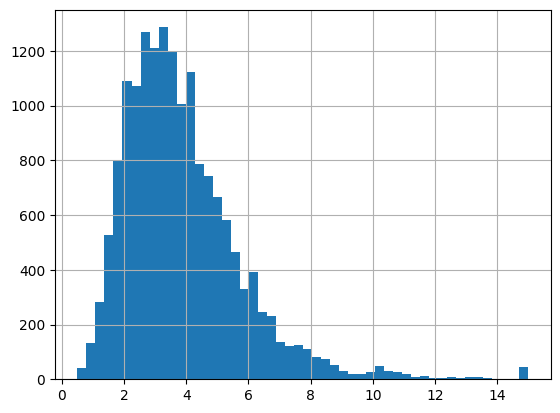

In [7]:
train['median_income'].hist(bins=50)

<Axes: >

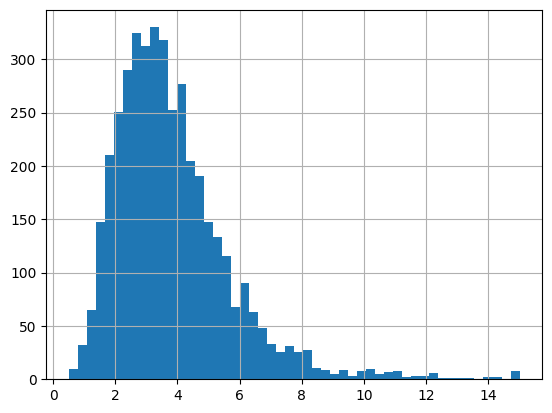

In [8]:
test['median_income'].hist(bins=50)

<Axes: >

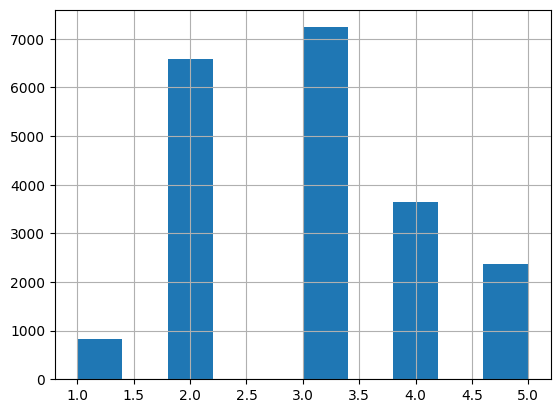

In [9]:
data['income_cat'] = pd.cut(data['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
data['income_cat'].hist()

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['income_cat'])

<Axes: >

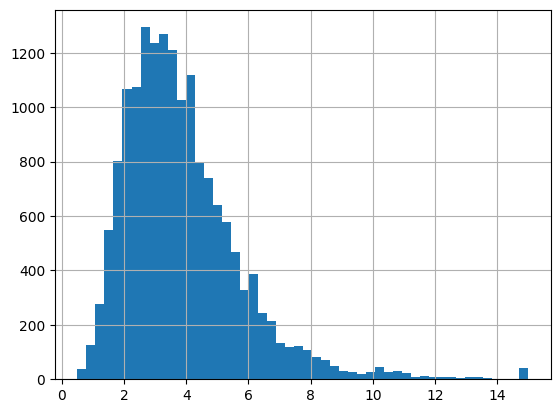

In [11]:
train['median_income'].hist(bins=50)

<Axes: >

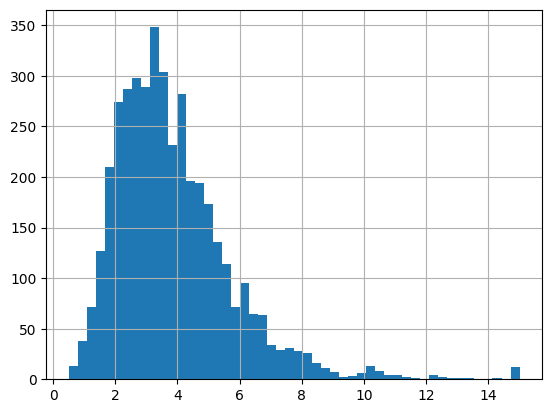

In [12]:
test['median_income'].hist(bins=50)

In [13]:
for set_ in (train, test):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
train.to_csv('housing_train.csv', index=False)
test.to_csv('housing_test.csv', index=False)

## EDA

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [16]:
data = loadData('housing_train.csv')
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15665,-118.45,34.24,11.0,9053.0,2193.0,7096.0,2038.0,3.5082,136500.0,<1H OCEAN
8836,-118.39,34.20,19.0,2012.0,732.0,3483.0,731.0,2.2234,181300.0,<1H OCEAN
10438,-122.53,37.65,20.0,4582.0,1124.0,2325.0,1040.0,4.0556,275000.0,NEAR OCEAN
6468,-117.77,33.71,15.0,2102.0,295.0,1060.0,303.0,7.3141,337100.0,<1H OCEAN
7869,-117.91,34.07,33.0,2938.0,561.0,1519.0,549.0,4.5594,204200.0,<1H OCEAN
10495,-117.49,33.98,17.0,2727.0,462.0,1691.0,448.0,4.8371,160600.0,INLAND
7582,-120.30,37.99,23.0,1908.0,383.0,984.0,374.0,2.5170,153500.0,INLAND
15578,-118.38,33.82,35.0,3053.0,623.0,1311.0,589.0,5.1589,439200.0,NEAR OCEAN
11807,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,INLAND
14229,-117.87,33.89,25.0,1142.0,162.0,486.0,150.0,7.1472,270100.0,<1H OCEAN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [18]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [19]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


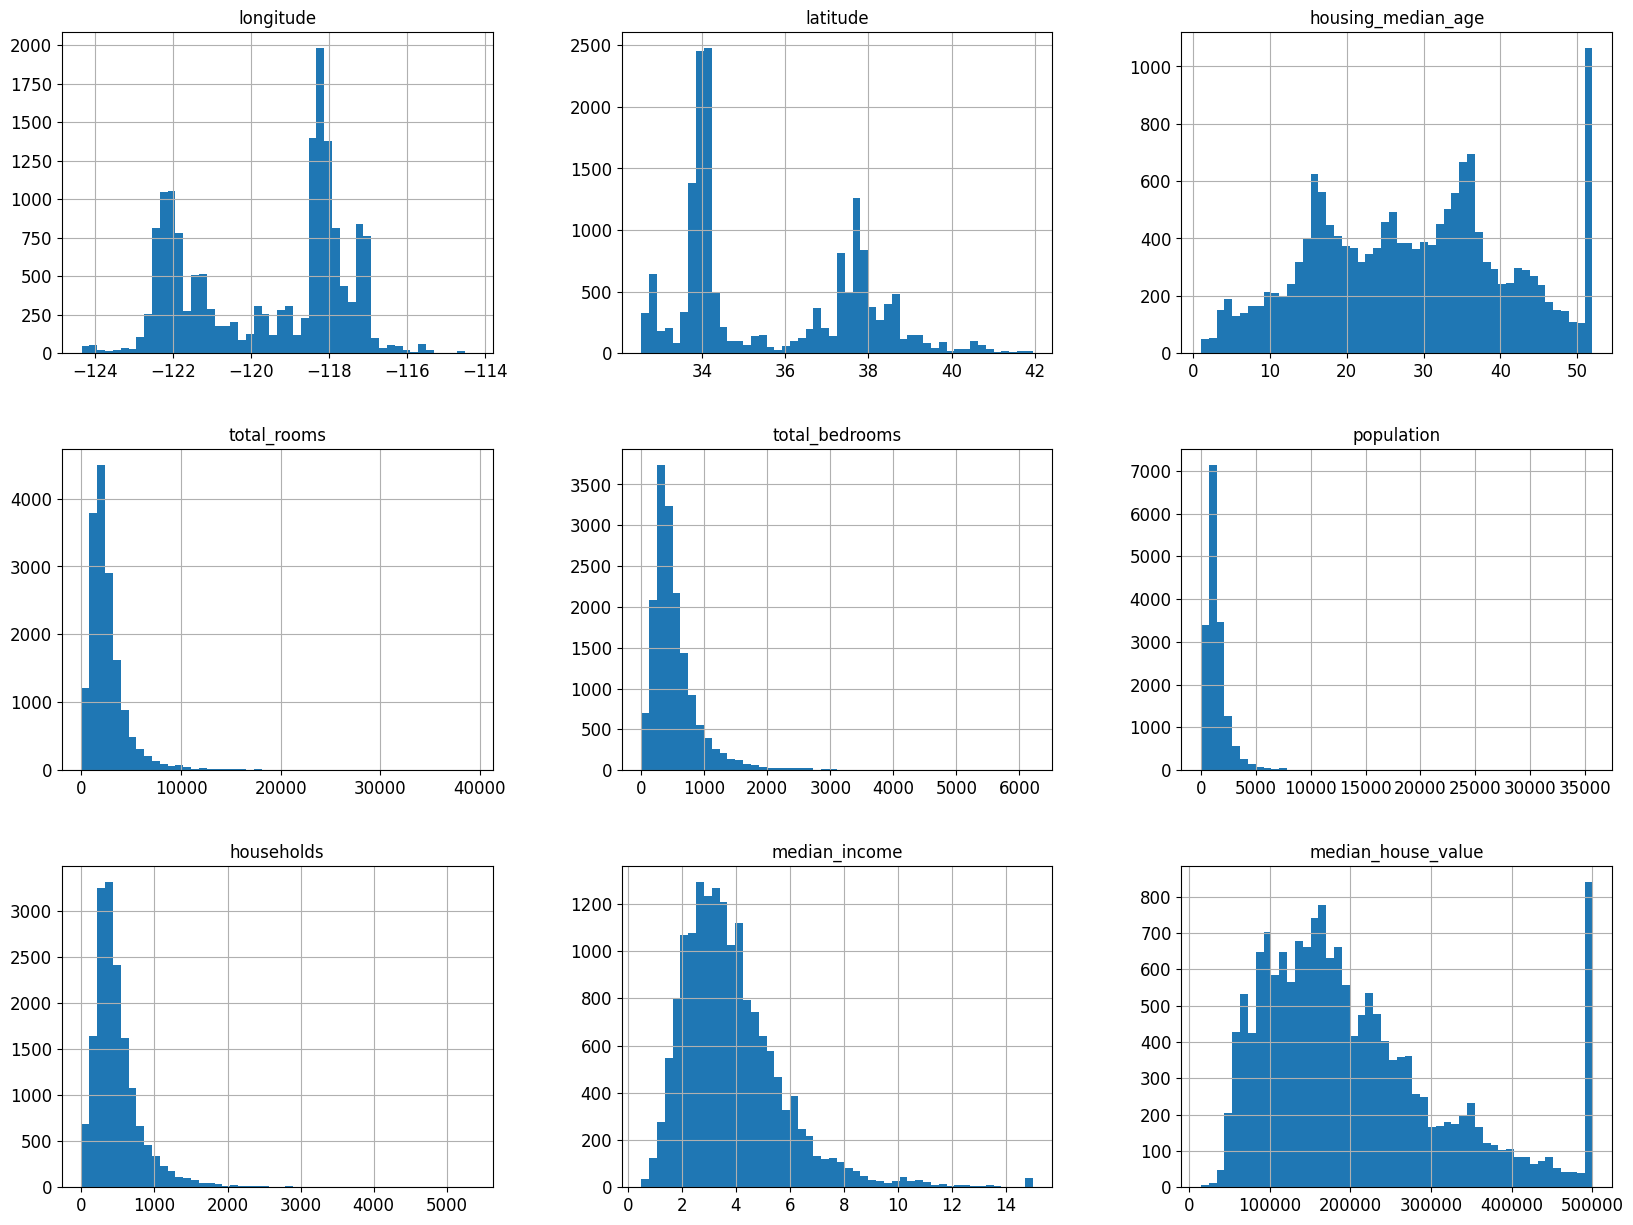

In [20]:
data.hist(bins=50, figsize=(20,15))
plt.show()

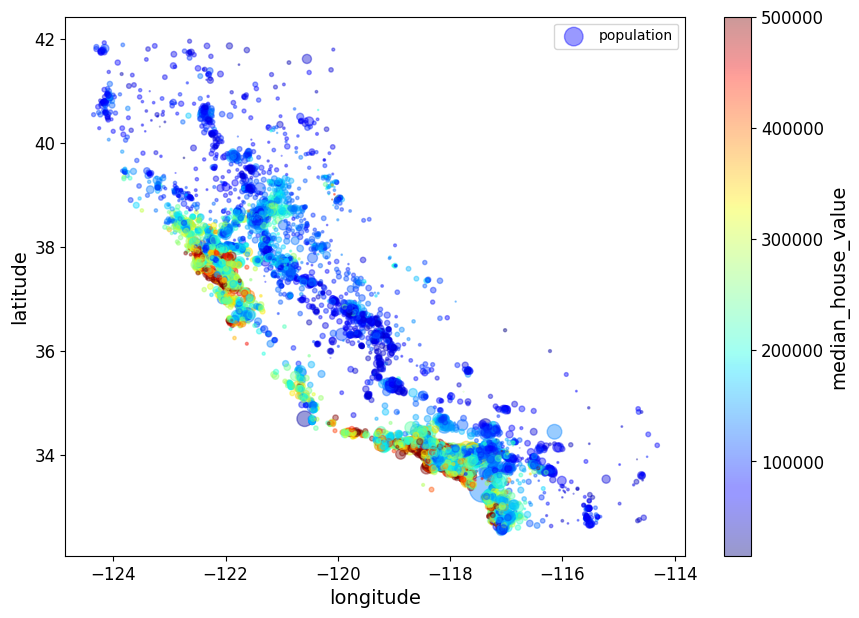

In [21]:
# plot geographical data

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

In [22]:
# looking for correlations

corr_matrix = data.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

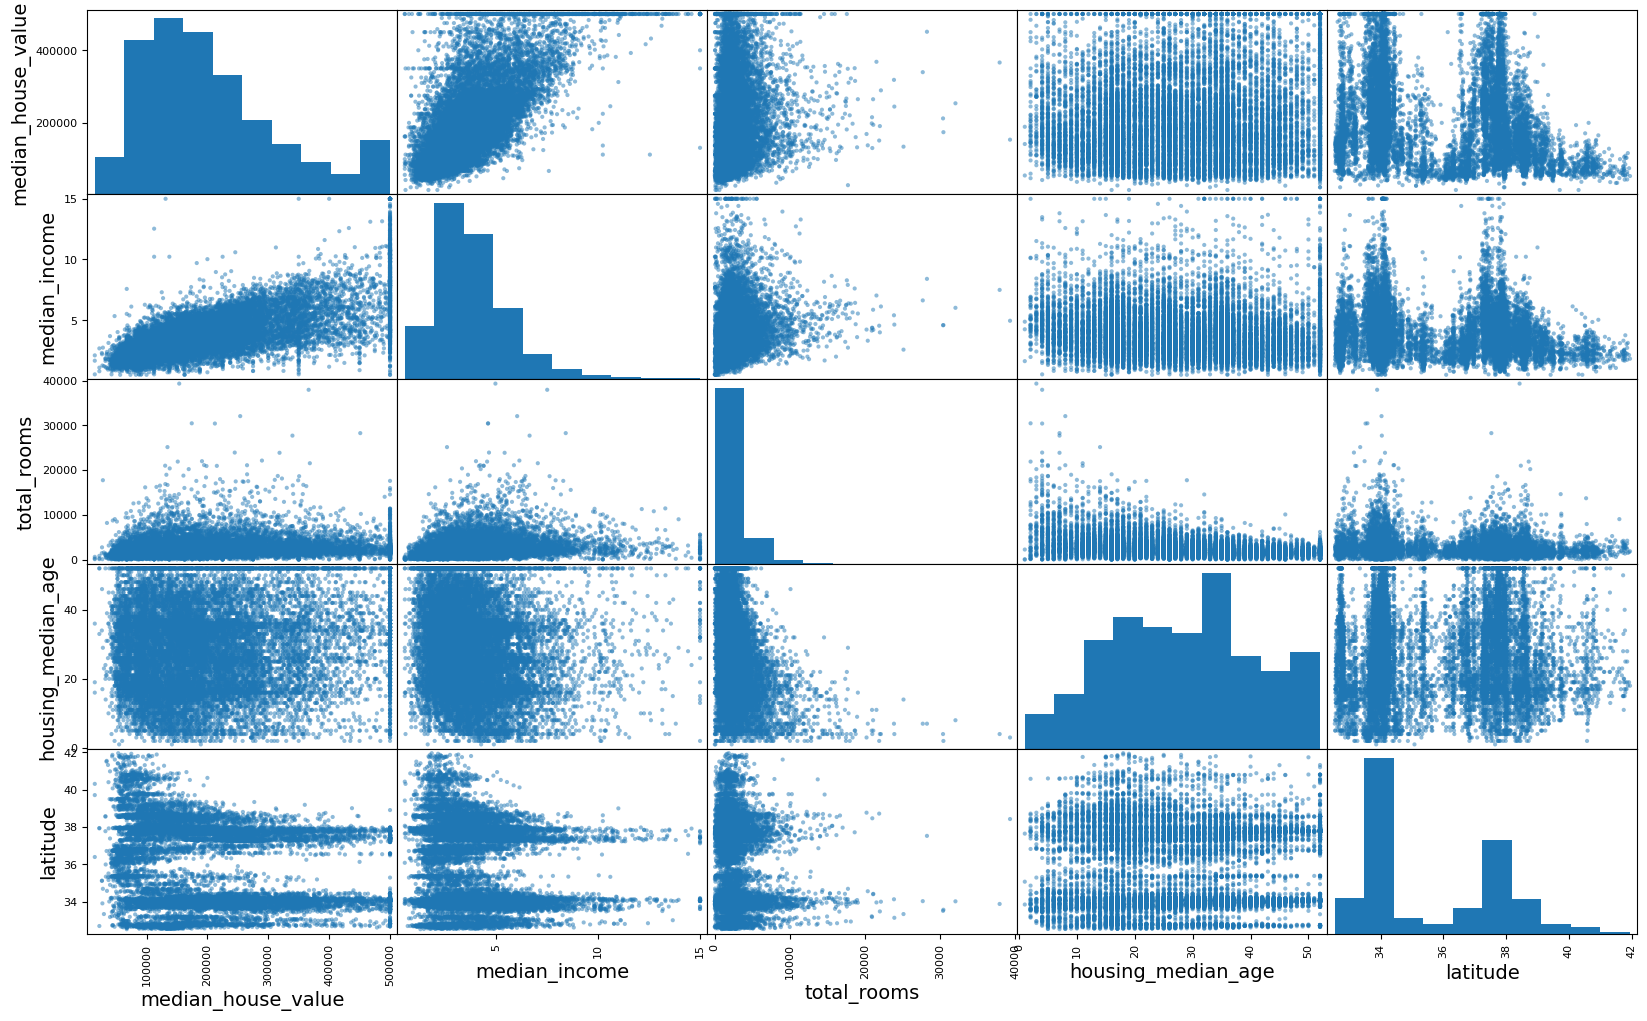

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age", "latitude"]
scatter_matrix(data[attributes], figsize=(20, 12))
plt.show()

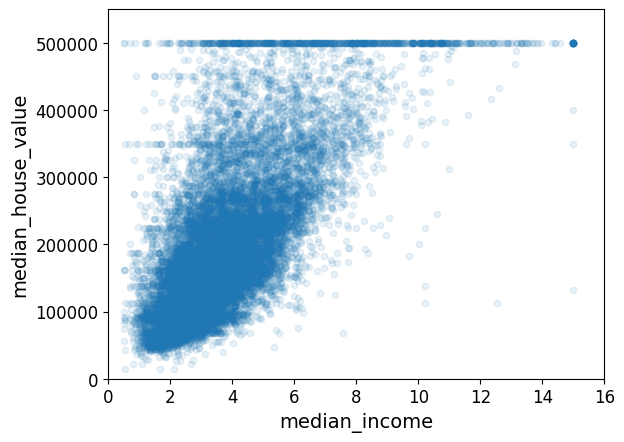

In [24]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

### Feature engineering

In [25]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

In [26]:
corr_matrix = data.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Preparación datos

In [27]:
data = pd.read_csv('housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [28]:
data, labels = data.drop(['median_house_value'], axis=1), data['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [29]:
labels.head()

0     72100.0
1    279600.0
2     82700.0
3    112500.0
4    238300.0
Name: median_house_value, dtype: float64

### Limpieza de datos

Es común tener valores que faltan en nuestros datos (missing values). Podemos proceder de diferentes maneras:
- Eliminar las filas con algún valor faltante
- Eliminar la característica completa si algún valor está faltando
- Establecer los valores faltantes a algún valor (cero, media, mediana, ...). Es importante usar un valor calculado a partir del conjunto de entrenamiento y guardarlo para usarlo en el conjunto de prueba.

In [30]:
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
86,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
373,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
431,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
528,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
647,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15894,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
16109,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
16129,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16152,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [31]:
data.dropna(subset=["total_bedrooms"])    # opción 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [32]:
data.drop("total_bedrooms", axis=1)       # opción 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [33]:
data.fillna(data["total_bedrooms"].median()) # opción 3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


Separamos variables numéricas y categóricas.

In [34]:
data_num = data.drop(['ocean_proximity'], axis=1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [35]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
0,INLAND
1,NEAR OCEAN
2,INLAND
3,NEAR OCEAN
4,<1H OCEAN


In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
data_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
X = imputer.transform(data_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [39]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


Los algoritmos de ML no pueden manejar datos no numéricos. Tenemos que transformar los valores categóricos a números. Tenemos varias opciones:
- Usar un número que determine la clase (0, 1, 2, ...). Esto se recomienda si dos clases cercanas están más relacionadas (como "excelente", "bueno", "promedio", "malo").
- Codificación one-hot. Esto se recomienda si las clases no están relacionadas en absoluto.

In [40]:
# opción 1

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [43]:
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Normalmente tendrás que escribir tu propio flujo de transformación de datos, y querrás que funcione sin problemas con el resto de la funcionalidad de Scikit-Learn. También puedes añadir hiperparámetros a las transformaciones (veremos qué significa esto y por qué es importante).

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [45]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)

Los algoritmos de ML generalmente no funcionan bien si los datos tienen diferentes escalas. Hay dos formas de escalar los datos:

- El escalado min-max (o normalización) consiste en desplazar los valores para que terminen en el rango 0-1.
- La estandarización funciona restando la media y dividiendo por la desviación estándar. Es menos afectada por valores atípicos, pero puede no funcionar bien con algunos algoritmos.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        # ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [47]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

## Selección modelo

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, labels)

LinearRegression()

In [49]:
some_data = data.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


In [50]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [51]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(69050.56219504567)

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, labels)

DecisionTreeRegressor(random_state=42)

In [53]:
predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

El árbol de decisión es capaz de memorizar todos los datos y lograr un error de 0. El problema es que si pasamos nuevos datos, el modelo no funcionará bien debido al overfitting. Necesitamos ser capaces de medir el rendimiento de nuestro modelo durante el entrenamiento. Tenemos dos opciones:

- Dividir una pequeña parte de los datos de entrenamiento en un conjunto de validación.
- Usar validación cruzada (recomendado si es computacionalmente viable).

### validación cruzada

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71177.6601991  69770.07865373 64770.5639395  68536.60203993
 67057.08155801 68847.12456973 70977.38255647 69208.86346929
 67187.87131535 73280.38732407]
Mean: 69081.361562518
Standard deviation: 2296.288087393378


In [56]:
lin_scores = cross_val_score(lin_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494766
Standard deviation: 2372.0707910559236


In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_prepared, labels)
predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(22528.532428450322)

In [58]:
forest_scores = cross_val_score(forest_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [54082.28391088 50961.02862467 48542.53245131 52877.62664578
 49096.84881566 51656.38378538 54814.82268403 51090.38640227
 49725.57426316 54589.19093748]
Mean: 51743.667852063474
Standard deviation: 2160.0120640441846


## Finetuning

El ajuste fino (fine-tuning) es el proceso de buscar los mejores hiperparámetros para tu modelo. Puedes hacerlo manualmente (no recomendado) o utilizando Scikit-Learn.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63743.43084091899 {'max_features': 2, 'n_estimators': 3}
55023.919331085264 {'max_features': 2, 'n_estimators': 10}
52672.61048954053 {'max_features': 2, 'n_estimators': 30}
60299.48845134689 {'max_features': 4, 'n_estimators': 3}
53106.41271952157 {'max_features': 4, 'n_estimators': 10}
50396.32971134071 {'max_features': 4, 'n_estimators': 30}
58363.22748437211 {'max_features': 6, 'n_estimators': 3}
52446.057900340325 {'max_features': 6, 'n_estimators': 10}
50177.91173851986 {'max_features': 6, 'n_estimators': 30}
58058.12321723554 {'max_features': 8, 'n_estimators': 3}
51849.42681935635 {'max_features': 8, 'n_estimators': 10}
49941.11534754462 {'max_features': 8, 'n_estimators': 30}
62820.05402812565 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53846.18083156347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59026.17902108823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52996.55803561763 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.05784555e-01, 9.77608475e-02, 5.05551584e-02, 3.04116971e-02,
       2.69356863e-02, 4.06259319e-02, 2.63850940e-02, 4.51422930e-01,
       1.04299655e-02, 1.53177272e-01, 1.56358159e-05, 1.59417083e-03,
       4.90105654e-03])

In [64]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.4514229299024067), 'median_income'),
 (np.float64(0.1531772715909896), 'pop_per_hhold'),
 (np.float64(0.1057845546735567), 'longitude'),
 (np.float64(0.09776084745397101), 'latitude'),
 (np.float64(0.050555158353914685), 'housing_median_age'),
 (np.float64(0.04062593190523443), 'population'),
 (np.float64(0.03041169711846745), 'total_rooms'),
 (np.float64(0.026935686293612923), 'total_bedrooms'),
 (np.float64(0.02638509400288614), 'households'),
 (np.float64(0.010429965515030306), 'rooms_per_hhold'),
 (np.float64(0.004901056539401569), 'INLAND'),
 (np.float64(0.0015941708346023545), '<1H OCEAN'),
 (np.float64(1.5635815926181513e-05), 'bedrooms_per_room')]

Calculamos metricas finales en el conjunto de test.

In [65]:
test_data = pd.read_csv('housing_test.csv')

final_model = grid_search.best_estimator_

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_rmse

np.float64(47859.544319108194)

In [67]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45909.04350565, 49733.6072416 ])

## Presenta tu solución

Al presentar tu solución, ten en cuenta lo siguiente:

- ¿Qué has aprendido?
- ¿Qué funcionó y qué no?
- ¿Qué suposiciones se hicieron?
- ¿Cuáles son las limitaciones de tu sistema?

Documenta todo y prepara una presentación atractiva con visualizaciones claras y declaraciones fáciles de recordar.

¿Es tu solución mejor que la solución actual (línea base)?

## Lanza, monitoriza y mantén tu sistema

Guarda tu modelo y hazlo accesible. Opciones populares son las API Web, donde los usuarios pueden enviar solicitudes y recibir predicciones.

In [68]:
import joblib

joblib.dump(final_model, "housing-app/my_model.pkl")
joblib.dump(full_pipeline, "housing-app/my_pipeline.pkl");

https://elcursodeia-housing.vercel.app/

Para monitorear tu sistema, tendrás que recopilar datos nuevos regularmente y etiquetarlos, ejecutar todo el pipeline en los nuevos datos y verificar si el sistema se comporta como se espera o se degrada. El proceso puede automatizarse y ejecutarse cada día o semana.

Es importante mantener copias de seguridad de los modelos y los datos con los que fueron entrenados para poder revertir a versiones anteriores si algo se rompe.